In [1]:
from __future__ import annotations
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [2]:
cases = ['Nextcloud', 'Owncloud', 'Now in Android', 'Eats', 'PCMark']
usages: List[pd.Series] = []
for case in cases:
    case_path = case.lower().replace(' ', '')
    df = pd.read_csv(f'../data/{case_path}/hardware/nvidia-smi_filtered.csv')
    usage = df['utilization.gpu [%]']
    usage = usage[usage > 0]
    usages.append(usage)

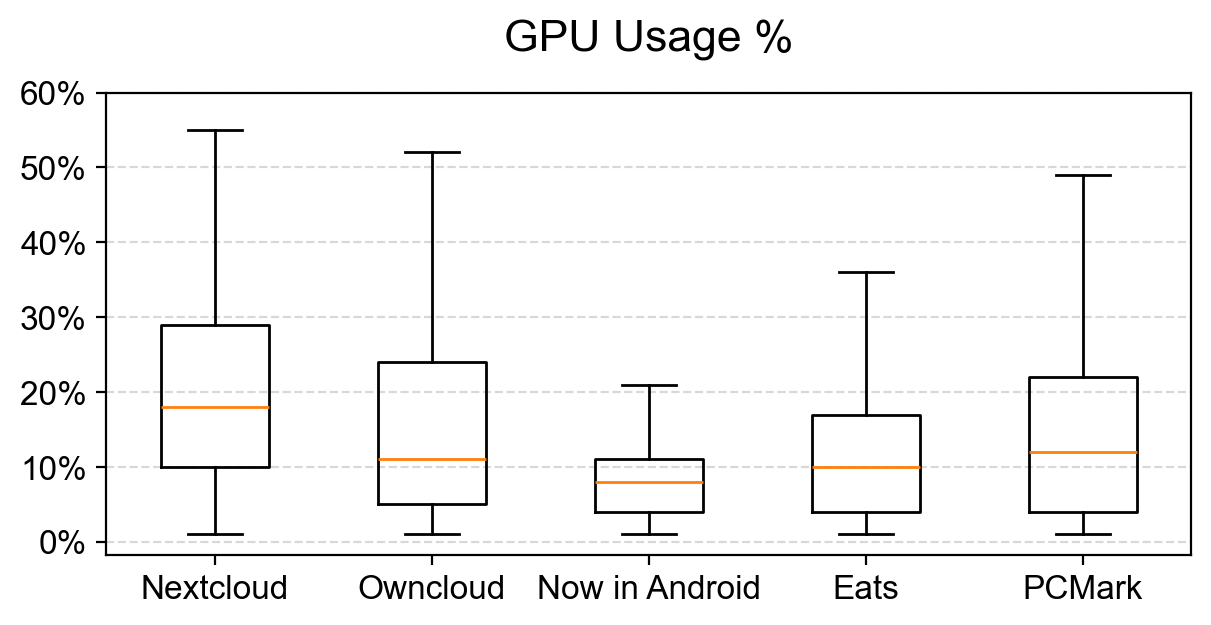

In [8]:
ax: plt.Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3), dpi=200)

plt.title('GPU Usage %', fontsize=16, pad=15)

ax.boxplot(
    x = usages,
    showfliers=False,
)

# x axis
ax.set_xticks(ticks=np.arange(len(cases)) + 1, labels=cases)

# y axis
ticks = np.arange(0, 61, 10)
ax.set_yticks(ticks=ticks, labels=[f'{tick}%' for tick in ticks])
ax.yaxis.grid(visible=True, linestyle='--', color='grey', alpha=0.3)

plt.show()


In [20]:
usages: List[float] = []

for case in cases:
    if case == 'PCMark':
        continue

    df = pd.read_csv(f'../data/{case.lower().replace(" ", "")}/hardware/nvidia-smi_filtered.csv')
    usage = df['utilization.gpu [%]']
    usage = usage[usage > 0]

    usages.append(usage.median())

avg_usage = np.mean(usages)
print(f"Average GPU usage across Nextcloud, Owncloud, NIA and Eats benchmarks: {round(avg_usage, 2)}%")

Average GPU usage across Nextcloud, Owncloud, NIA and Eats benchmarks: 11.75%
